       AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  53415.000000  5.341500e+04  5.341500e+04  5.341500e+04  5.341500e+04   
mean       1.428910  8.694474e+05  2.982707e+05  2.222170e+05  2.053195e+04   
std        0.393116  3.545274e+06  1.307669e+06  9.554624e+05  1.040977e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.119091  1.626465e+04  6.947250e+02  2.120800e+03  0.000000e+00   
50%        1.400000  1.203525e+05  1.458058e+04  1.751663e+04  9.005000e+01   
75%        1.690000  4.542380e+05  1.287924e+05  9.351560e+04  3.599735e+03   
max        3.440830  6.103446e+07  2.544720e+07  2.047057e+07  2.860025e+06   

          TotalBags     SmallBags     LargeBags     XLargeBags  
count  5.341500e+04  4.102500e+04  4.102500e+04   41025.000000  
mean   2.175083e+05  1.039222e+05  2.331316e+04    2731.811796  
std    8.676947e+05  5.692608e+05  1.496622e+05   22589.096454  
min    0.000000e+00  0.00000

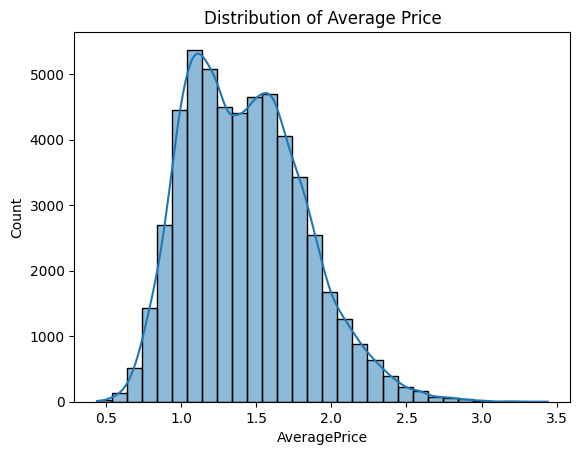

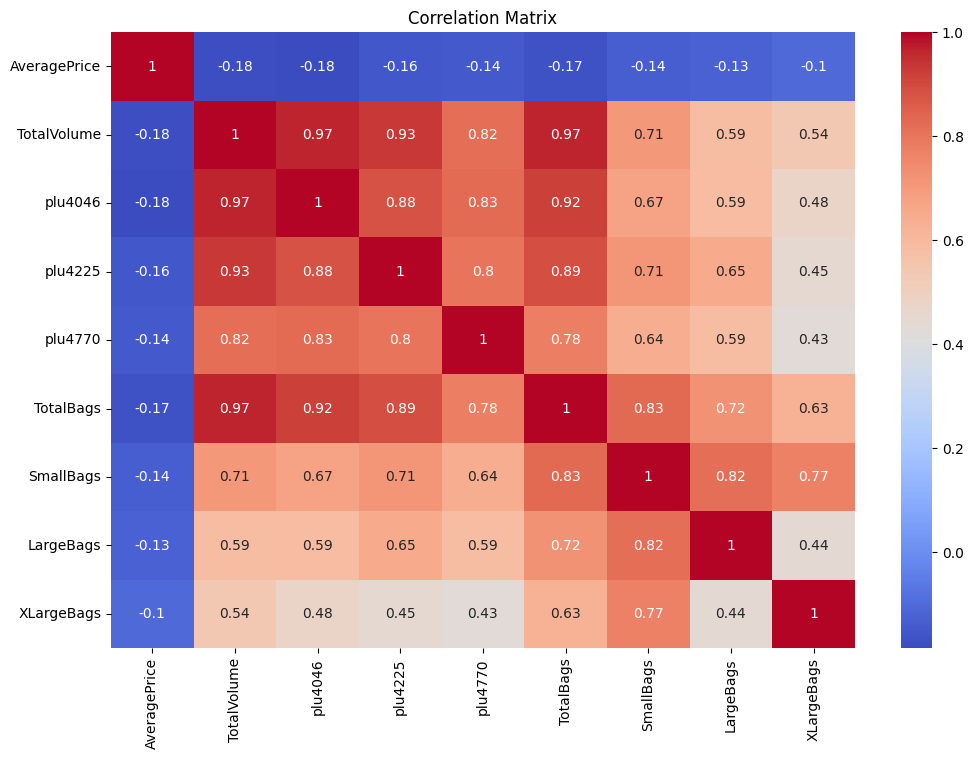

Mean Squared Error: 0.011626308282719154
R^2 Score: 0.9242226692013722


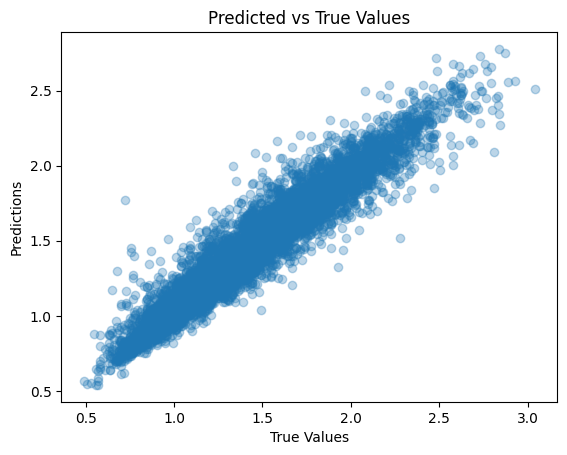

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

# Step 1: Exploratory Data Analysis (EDA)

# Basic statistics
print(data.describe())

# Check for missing values
print(data.isna().sum())

# Visualize the distribution of AveragePrice
sns.histplot(data['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.show()

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract numerical features only for the correlation matrix
numeric_data = data.drop(columns=['Date', 'type', 'region'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 2: Data Preprocessing

# Handle missing values
data['SmallBags'].fillna(data['SmallBags'].mean(), inplace=True)
data['LargeBags'].fillna(data['LargeBags'].mean(), inplace=True)
data['XLargeBags'].fillna(data['XLargeBags'].mean(), inplace=True)

# Extract new date features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Drop the Date column as it's now represented in Year and Month
data.drop(columns=['Date'], inplace=True)

# Define categorical and numerical features
cat_features = ['type', 'region']
num_features = data.columns.difference(cat_features + ['AveragePrice']).tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Step 3: Model Building

# Split data into features and target
X = data.drop(columns=['AveragePrice'])
y = data['AveragePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Step 4: Evaluation

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the predictions
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')
plt.show()
